In [1]:
# TF 2.3.1 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
x=dataset.iloc[:, 3:13]  # Independent variables
y=dataset.iloc[:,13]    # Dependent Variables

In [5]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
geography=pd.get_dummies(x["Geography"], drop_first=True)
gender=pd.get_dummies(x['Gender'], drop_first=True)

In [7]:
x=x.drop(["Geography","Gender"], axis=1)

In [8]:
X=pd.concat([x,geography,gender], axis=1)
X.head()
            

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [9]:
list(X.columns) 

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Germany',
 'Spain',
 'Male']

In [10]:
# Continous variables are left side of dataframe
X=X[['EstimatedSalary','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','Germany','Spain','Male']]
X.head()


,EstimatedSalary,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Germany,Spain,Male
0,101348.88,619,42,2,0.00,1,1,1,0,0,0
1,112542.58,608,41,1,83807.86,1,0,1,0,1,0
2,113931.57,502,42,8,159660.80,3,1,0,0,0,0
3,93826.63,699,39,1,0.00,2,0,0,0,0,0
4,79084.10,850,43,2,125510.82,1,1,1,0,1,0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=10)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train.iloc[:,0:6]=sc.fit_transform(X_train.iloc[:,0:6])
X_test.iloc[:,0:6]=sc.transform(X_test.iloc[:,0:6])

c:\users\91974\anaconda3\envs\tf_greater_2\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
c:\users\91974\anaconda3\envs\tf_greater_2\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [13]:
# Convert dataframe to Numpy 
X_train=X_train.values
X_test=X_test.values

In [14]:
# model building without keras tuner -----------------------------------------------------------------------------
model=Sequential()
model.add(Dense(units=10,kernel_initializer='he_uniform', activation='relu', input_dim=11))  # 1st hidden layer
model.add(Dense(units=10,kernel_initializer='he_uniform', activation='relu'))                #2nd hidden layer
model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))  #output layer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [16]:
X_train.shape

(8000, 11)

In [17]:
training_history=model.fit(X_train,y_train, validation_split=0.33,batch_size = 100,epochs = 100)

Epoch 1/100
54/54 [==============================] - 0s 6ms/step - loss: 1.0458 - accuracy: 0.4154 - val_loss: 0.7352 - val_accuracy: 0.5933
Epoch 2/100
54/54 [==============================] - 0s 4ms/step - loss: 0.6195 - accuracy: 0.6940 - val_loss: 0.5452 - val_accuracy: 0.7615
Epoch 3/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5221 - accuracy: 0.7746 - val_loss: 0.5035 - val_accuracy: 0.7887
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4911 - accuracy: 0.7901 - val_loss: 0.4832 - val_accuracy: 0.7940
Epoch 5/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4729 - accuracy: 0.7946 - val_loss: 0.4705 - val_accuracy: 0.7970
Epoch 6/100
54/54 [==============================] - 0s 4ms/step - loss: 0.4599 - accuracy: 0.7983 - val_loss: 0.4618 - val_accuracy: 0.8001
Epoch 7/100
54/54 [==============================] - 0s 4ms/step - loss: 0.4509 - accuracy: 0.7970 - val_loss: 0.4551 - val_accuracy: 0.7993
Epoch 8/100
5

Epoch 59/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.8621 - val_loss: 0.3489 - val_accuracy: 0.8542
Epoch 60/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8628 - val_loss: 0.3489 - val_accuracy: 0.8546
Epoch 61/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8630 - val_loss: 0.3472 - val_accuracy: 0.8573
Epoch 62/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8638 - val_loss: 0.3476 - val_accuracy: 0.8561
Epoch 63/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.8640 - val_loss: 0.3497 - val_accuracy: 0.8535
Epoch 64/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3326 - accuracy: 0.8642 - val_loss: 0.3470 - val_accuracy: 0.8573
Epoch 65/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.8643 - val_loss: 0.3465 - val_accuracy: 0.8576
Epoch 

In [18]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

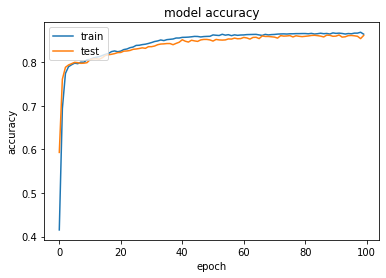

In [19]:
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

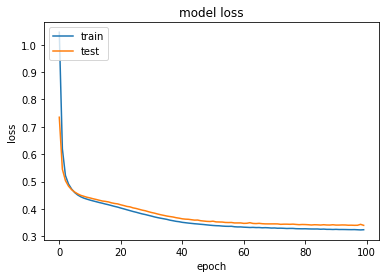

In [20]:
# summarize history for loss
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
y_pred=model.predict(X_test)
y_pred=y_pred>0.5

In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [23]:
cm

array([[1502,   76],
       [ 225,  197]], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.8495

# Keras Tuner
We got the test accuracy of 84.95% with two hidden layer of 10 neurons. In this experirment we randomly selected number of hidden layer and neurons.

#Now we try with keras tuner for differnt hyperparameter tuning and we will use random search for this. 

In [25]:
# Hyperparameter

def build_model(hp):
    classifier = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        classifier.add(layers.Dense(units=hp.Int('units'+ str(i),
                                        min_value=32,
                                        max_value=512,
                                        step=32),
                           activation='relu'))
    classifier.add(layers.Dense(1, activation='softmax'))
    classifier.compile(optimizer=keras.optimizers.Adam( hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [26]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

Next,Instantiate a tuner. You should specify the model-building function, the name of the objective to optimize (whether to minimize or maximize is automatically inferred for built-in metrics), the total number of trials (max_trials) to test, and the number of models that should be built and fit for each trial (executions_per_trial).

In [27]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project1',
    project_name='Churn')

In [28]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [29]:
tuner.search(X_train, y_train,
             epochs=15,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 20s]
val_accuracy: 0.8554999828338623

Best val_accuracy So Far: 0.8560000061988831
Total elapsed time: 00h 01m 50s
INFO:tensorflow:Oracle triggered exit


In [32]:
tuner.get_best_models(num_models=2)

In [36]:
tuner.results_summary(2) # Top Two models. Once we get the hyperparameters, same can be used for model building

Results summary
Results in project1\Churn
Showing 2 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 12
units0: 32
units1: 96
learning_rate: 0.0001
units2: 224
units3: 352
units4: 448
units5: 128
units6: 64
units7: 448
units8: 480
units9: 256
units10: 256
units11: 480
units12: 416
units13: 192
Score: 0.8560000061988831
Trial summary
Hyperparameters:
num_layers: 12
units0: 128
units1: 192
learning_rate: 0.01
units2: 352
units3: 32
units4: 480
units5: 160
units6: 288
units7: 512
units8: 192
units9: 448
units10: 256
units11: 32
units12: 512
units13: 416
Score: 0.8554999828338623
